### plot the density and temperature profiles, and images, of the radmc3d model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from radmc3dPy import *
from scipy.interpolate import RectBivariateSpline
%matplotlib inline

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.


In [2]:
data = analyze.readData(ddens=True, dtemp=True)

FileNotFoundError: [Errno 2] No such file or directory: 'amr_grid.inp'

Reading dustkappa_silicate.inp
Opacity at 0.50um :  28460.764433351476


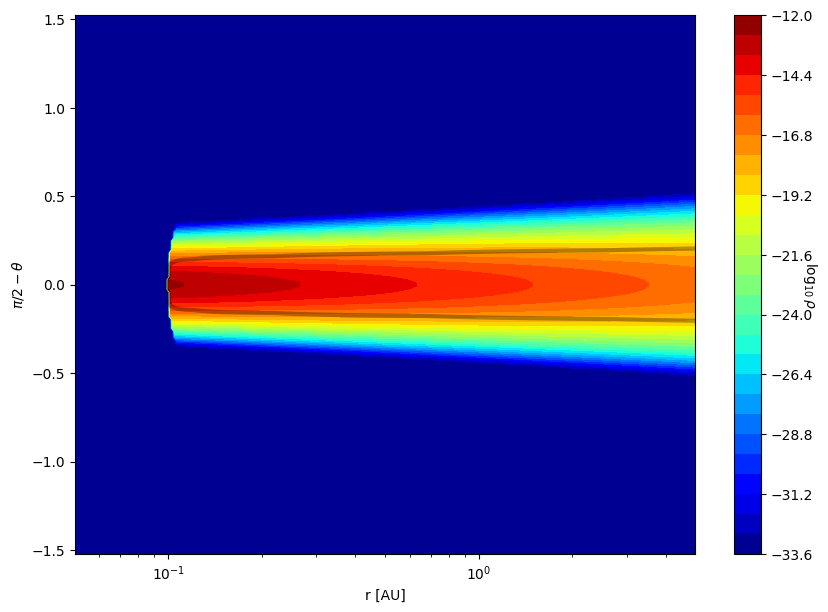

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

c1 = ax.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.rhodust[:,:,0,0].T), 30, cmap='jet')
ax.set_xlabel('r [AU]')
ax.set_ylabel(r'$\pi/2-\theta$')
ax.set_xscale('log')
cb = plt.colorbar(c1)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

Tlevs = (3+np.arange(10))*100
c2 = ax.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, Tlevs,  colors='w', linestyles='solid')
ax.clabel(c2, inline=1, fontsize=10)

data.getTau(wav=0.5)
c3 = ax.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.taux[:,:,0].T, [1.0],  colors='black', linestyles='solid', linewidths=3, alpha=0.3)

In [ ]:
# regrid into (r,z) physical coordinates
r = data.grid.x/natconst.au
nr = r.size
theta = data.grid.y-np.pi/2.
nt = theta.size

logdens = np.log10(data.rhodust[:,:,0,0])
Tdust = data.dusttemp[:,:,0,0]
tau = data.taux[:,:,0]
dens_spline = RectBivariateSpline(r, theta, logdens)
Tdust_spline = RectBivariateSpline(r, theta, Tdust)
tau_spline = RectBivariateSpline(r, theta, tau)

nz = 100
z = np.logspace(-2, 0.5, nz)

# convert cylindrical into spherical coordinates
rr = np.zeros(nr*nz)
tt = np.zeros(nr*nz)
k = 0
for j in range(nr):
    for i in range(nz):
        rr[k] = np.sqrt(r[j]**2 + z[i]**2)
        tt[k] = np.arctan(z[i]/r[j])
        k += 1
        
logdens_rz = dens_spline(rr, tt, grid=False).reshape(nr, nz)
Tdust_rz = Tdust_spline(rr, tt, grid=False).reshape(nr, nz)
tau_rz = tau_spline(rr, tt, grid=False).reshape(nr, nz)

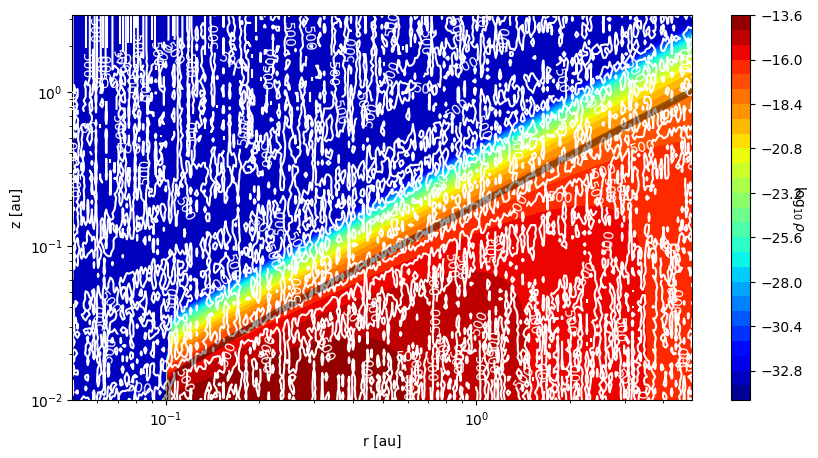

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

c1 = ax.contourf(r, z, logdens_rz.T, 30, cmap='jet')
ax.set_xlabel('r [au]')
ax.set_ylabel(r'z [au]')
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(c1)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

Tlevs = (2+np.arange(15))*100
c2 = ax.contour(r, z, Tdust_rz.T, Tlevs,  colors='w', linestyles='solid')
ax.clabel(c2, inline=1, fontsize=10)

c3 = ax.contour(r, z, tau_rz.T, [1.0],  colors='black', linestyles='solid', linewidths=5, alpha=0.4)

Reading dustkappa_silicate.inp


Text(0, 0.5, '$\\kappa_{\\rm abs}$ [cm$^2$/g]')

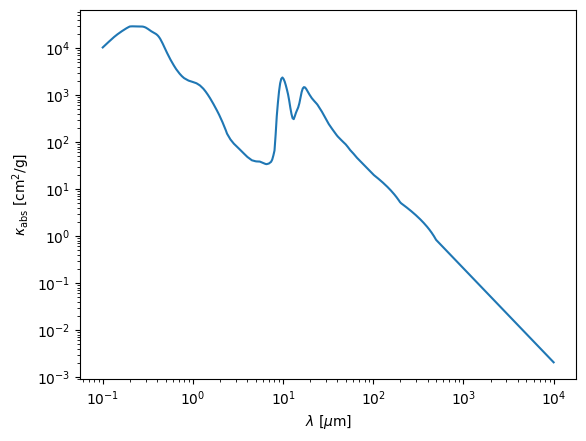

In [ ]:
opac = analyze.readOpac(ext=['silicate'])
plt.loglog(opac.wav[0], opac.kabs[0])
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')

In [ ]:
# remove lines.inp if necessary otherwise this crashes
image.makeImage(npix=300., wav=2.2, incl=20., phi=0., sizeau=300.)

Executing RADMC-3D Command:
radmc3d image npix 300 incl 20.0 sizeau 300.0 lambda 2.2 phi 0.0 pointau 0.0  0.0  0.0 fluxcons
  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelberg.de                  
                                                                 
   To keep up-to-date with bug-alarms and bugfixes, follow the   
                     RADMC-3D code on github                     
             ht

0

In [45]:
im = image.readImage()

Reading image.out


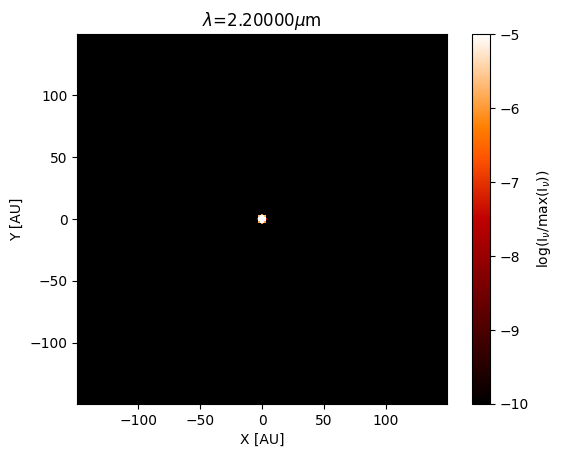

{'implot': <matplotlib.image.AxesImage at 0x7fce1b4e28b0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcdd85d4bb0>}

In [46]:
image.plotImage(im, au=True, log=True, maxlog=10, saturate=1e-5, cmap='gist_heat')

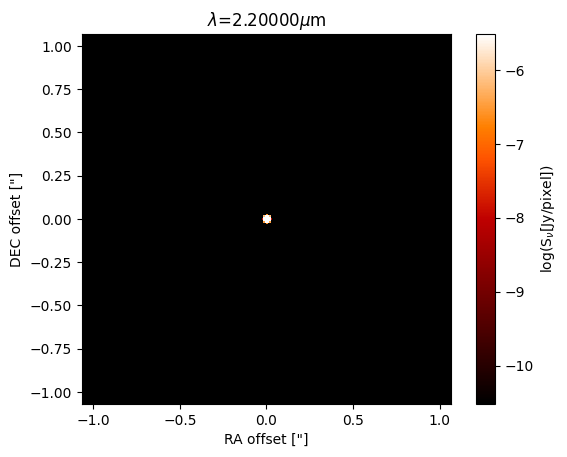

{'implot': <matplotlib.image.AxesImage at 0x7fcdd14fbd00>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcdd1539cd0>}

In [47]:
image.plotImage(im, arcsec=True, dpc=140., log=True, maxlog=10, saturate=1e-5, bunit='snu', cmap='gist_heat')

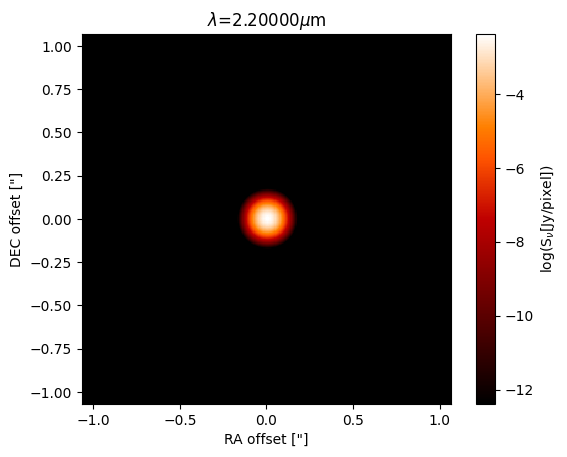

{'implot': <matplotlib.image.AxesImage at 0x7fcdc875ae80>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcdd1621f40>}

In [48]:
cim = im.imConv(fwhm=[0.06, 0.06], pa=0., dpc=140.)
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=10, bunit='snu', cmap='gist_heat')

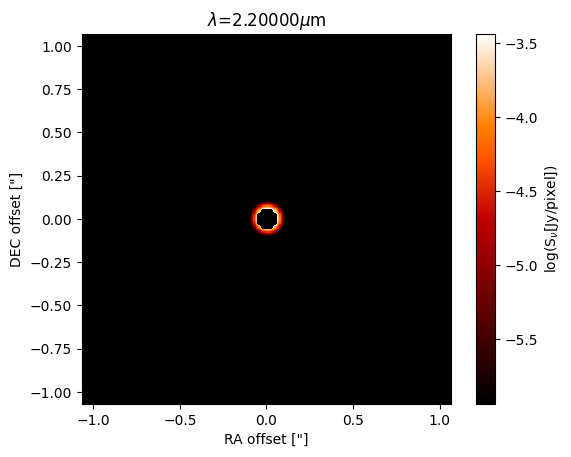

{'implot': <matplotlib.image.AxesImage at 0x7fcdb8b6ed00>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcdd16a0190>}

In [49]:
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=2.5, bunit='snu', cmask_rad=0.06, cmap='gist_heat')

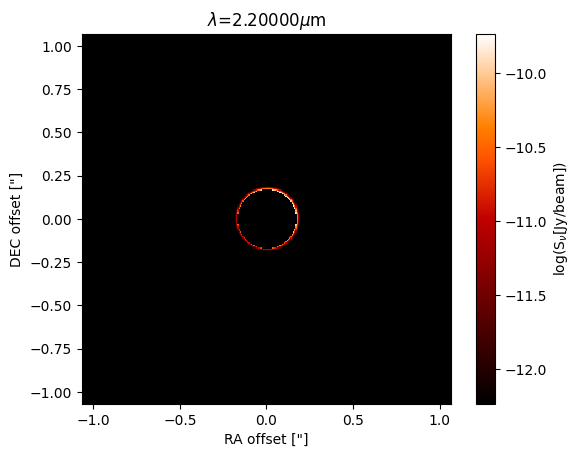

{'implot': <matplotlib.image.AxesImage at 0x7fcdc86c9490>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fcdc86d5760>}

In [50]:
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=2.5, bunit='jy/beam', cmask_rad=0.17, cmap='gist_heat')

In [51]:
im.writeFits('myimage.fits', dpc=140., coord='03h10m05s -10d05m30s')

myimage.fits already exists


Do you want to overwrite it (yes/no)? n


No image has been written
